<a href="https://colab.research.google.com/github/gyumin8/BDA_PROJECT/blob/main/%EB%8D%B0%EC%9D%B4%ED%84%B0_%EC%A0%84%EC%B2%98%EB%A6%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [54]:
import sys
import pandas as pd
import numpy as np
import seaborn as sns
import missingno as msno

print(sys.version)
print(pd.__version__)
print(np.__version__)
print(sns.__version__)
print(msno.__version__)

3.10.12 (main, Nov 20 2023, 15:14:05) [GCC 11.4.0]
2.0.3
1.25.2
0.13.1
0.5.2


In [55]:
!pip install koreanize_matplotlib

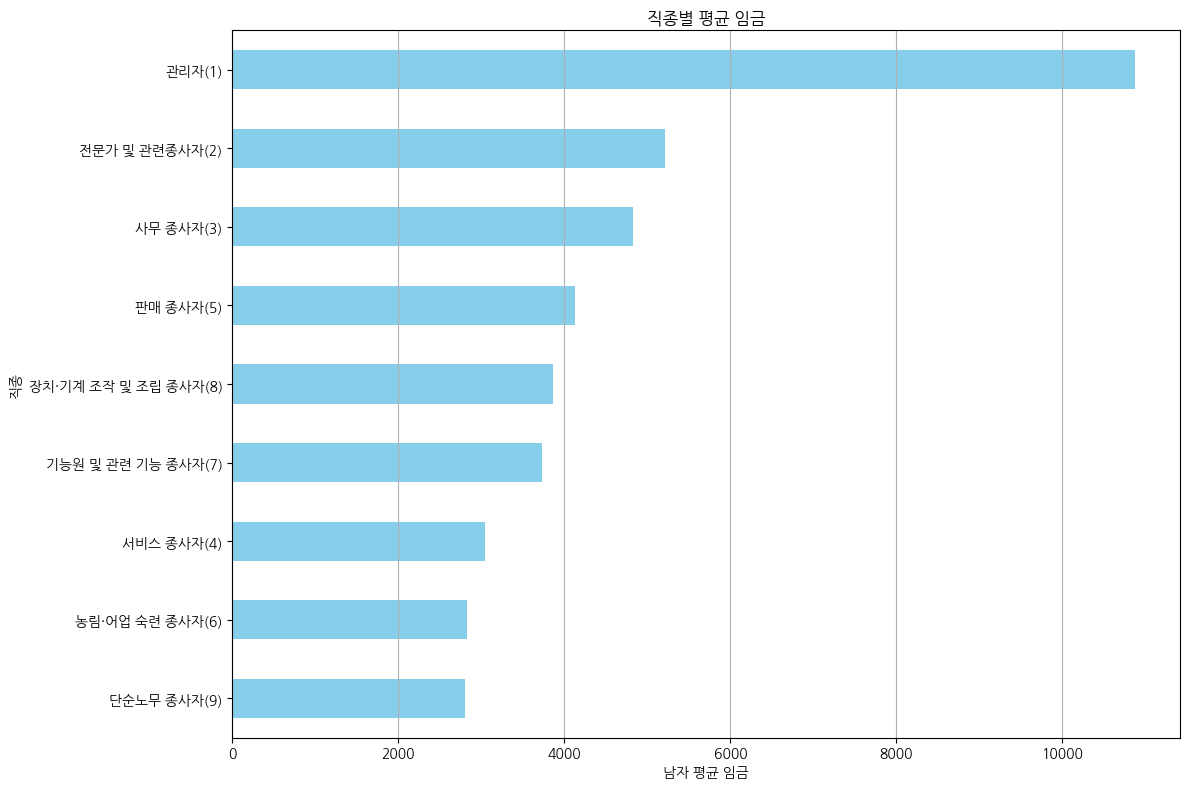

In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import koreanize_matplotlib

# 데이터 불러오기
df = pd.read_csv("남자_연령.csv", skiprows=1)
df_male = df[df['직종별'] != '전직종']
# 직종별로 평균 임금 계산
mean_salary_by_occupation = df_male.groupby('직종별')['월임금총액'].mean().sort_values()

# 그래프 그리기
plt.figure(figsize=(12, 8))
mean_salary_by_occupation.plot(kind='barh', color='skyblue')
plt.xlabel('남자 평균 임금')
plt.ylabel('직종')
plt.title('직종별 평균 임금')
plt.grid(axis='x')
plt.tight_layout()
plt.show()


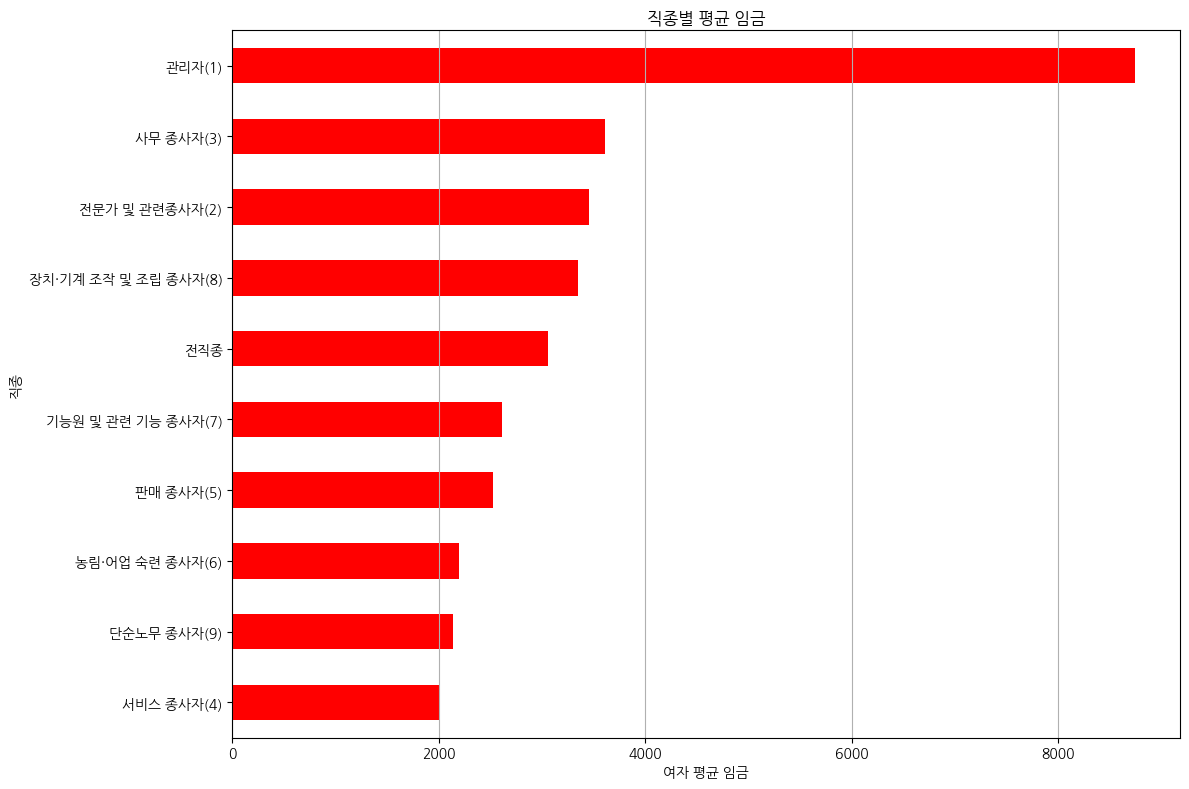

In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import koreanize_matplotlib

# 데이터 불러오기
df_female = pd.read_csv("여자_연령.csv", skiprows=1)
df = df[df['직종별'] != '전직종']
# 직종별로 평균 임금 계산
mean_salary_by_occupation = df_female.groupby('직종별')['월임금총액'].mean().sort_values()

# 그래프 그리기
plt.figure(figsize=(12, 8))
mean_salary_by_occupation.plot(kind='barh', color='red')
plt.xlabel('여자 평균 임금')
plt.ylabel('직종')
plt.title('직종별 평균 임금')
plt.grid(axis='x')
plt.tight_layout()
plt.show()


<Figure size 1200x800 with 0 Axes>

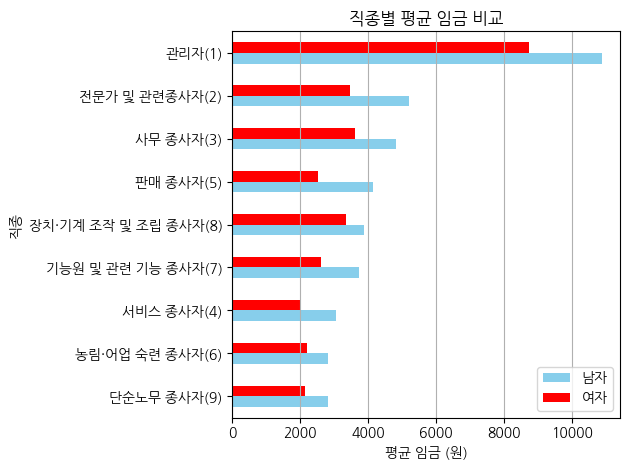

In [58]:


# 직종별로 평균 임금 계산
mean_salary_by_occupation_male = df_male.groupby('직종별')['월임금총액'].mean()
mean_salary_by_occupation_female = df_female.groupby('직종별')['월임금총액'].mean()

# 남자와 여자의 공통 직종만 남기기
common_occupations = mean_salary_by_occupation_male.index.intersection(mean_salary_by_occupation_female.index)
mean_salary_by_occupation_male = mean_salary_by_occupation_male[common_occupations]
mean_salary_by_occupation_female = mean_salary_by_occupation_female[common_occupations]

# 데이터프레임으로 결합하여 정렬
mean_salary_comparison = pd.DataFrame({
    '남자': mean_salary_by_occupation_male,
    '여자': mean_salary_by_occupation_female
}).sort_values(by='남자')

# 그래프 그리기
plt.figure(figsize=(12, 8))
mean_salary_comparison.plot(kind='barh', color=['skyblue', 'red'])
plt.xlabel('평균 임금 (원)')
plt.ylabel('직종')
plt.title('직종별 평균 임금 비교')
plt.grid(axis='x')
plt.tight_layout()
plt.show()


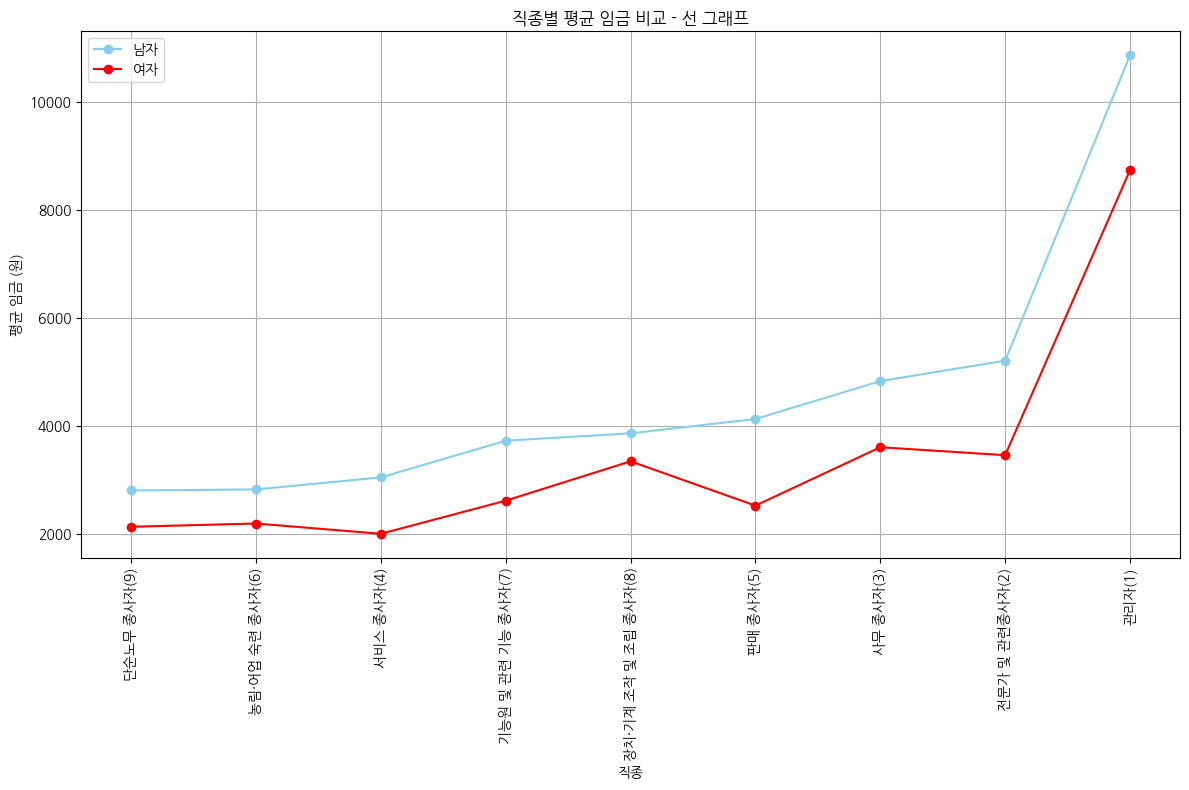

In [59]:


# 직종별로 평균 임금 계산
mean_salary_by_occupation_male = df_male.groupby('직종별')['월임금총액'].mean()
mean_salary_by_occupation_female = df_female.groupby('직종별')['월임금총액'].mean()

# 공통 직종만 남기기
common_occupations = mean_salary_by_occupation_male.index.intersection(mean_salary_by_occupation_female.index)
mean_salary_by_occupation_male = mean_salary_by_occupation_male[common_occupations]
mean_salary_by_occupation_female = mean_salary_by_occupation_female[common_occupations]

# 데이터프레임으로 결합하여 정렬
mean_salary_comparison = pd.DataFrame({
    '남자': mean_salary_by_occupation_male,
    '여자': mean_salary_by_occupation_female
}).sort_values(by='남자')

# 1. 두 개의 선 그래프를 겹쳐서 비교
plt.figure(figsize=(12, 8))
plt.plot(mean_salary_comparison.index, mean_salary_comparison['남자'], marker='o', label='남자', color='skyblue')
plt.plot(mean_salary_comparison.index, mean_salary_comparison['여자'], marker='o', label='여자', color='red')
plt.xlabel('직종')
plt.ylabel('평균 임금 (원)')
plt.title('직종별 평균 임금 비교 - 선 그래프')
plt.xticks(rotation=90)
plt.grid(axis='both')
plt.legend()
plt.tight_layout()
plt.show()


<Figure size 1200x800 with 0 Axes>

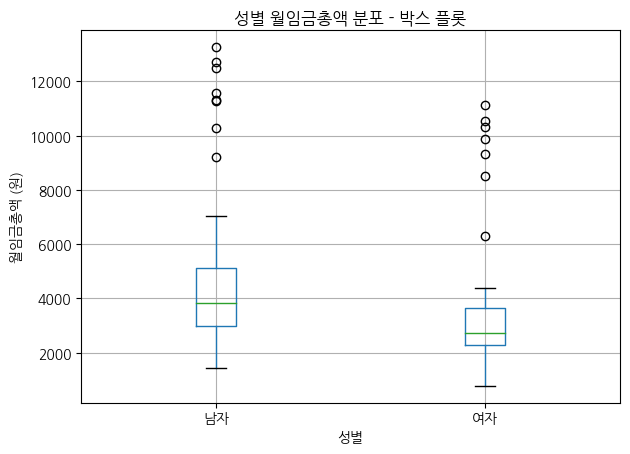

In [60]:
# 남자와 여자의 월임금총액 분포를 위한 데이터 결합
df_male['성별'] = '남자'
df_female['성별'] = '여자'
df_combined = pd.concat([df_male, df_female])

# 3. 박스 플롯
plt.figure(figsize=(12, 8))
df_combined.boxplot(column='월임금총액', by='성별', grid=True)
plt.xlabel('성별')
plt.ylabel('월임금총액 (원)')
plt.title('성별 월임금총액 분포 - 박스 플롯')
plt.suptitle('')
plt.tight_layout()
plt.show()


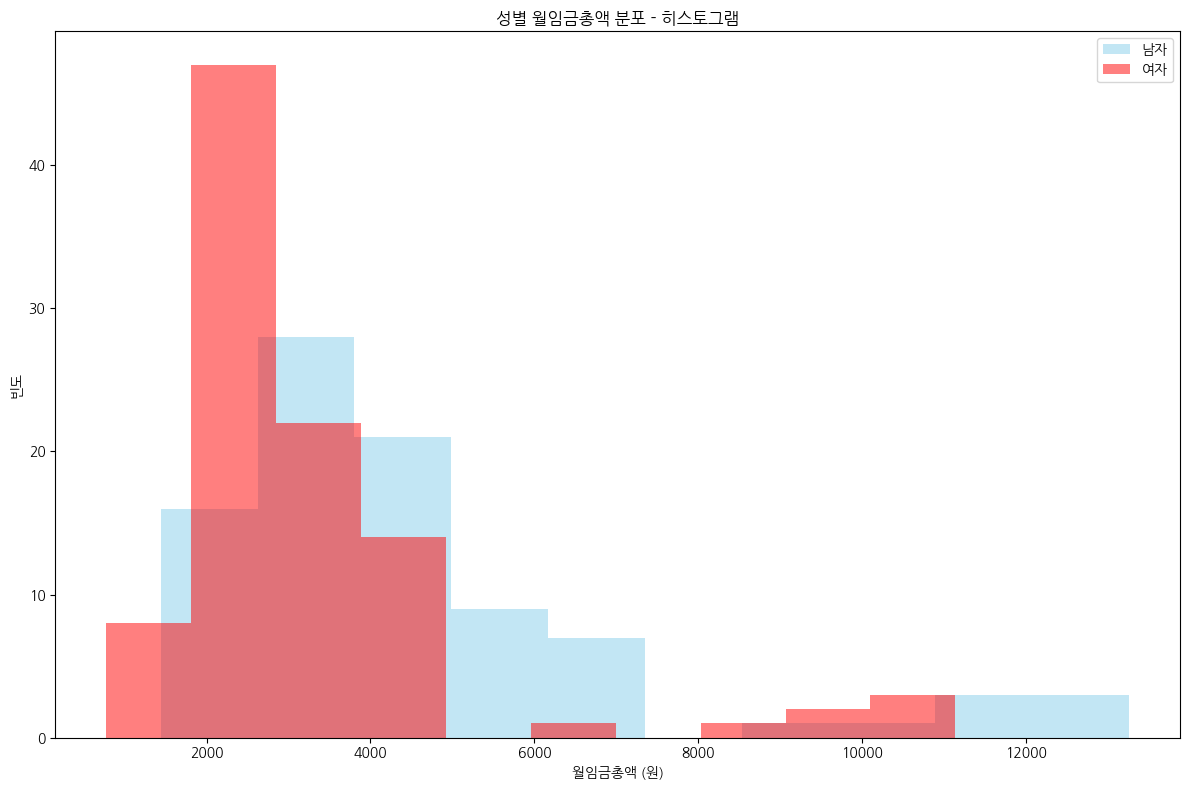

In [61]:
# 4. 히스토그램
plt.figure(figsize=(12, 8))
df_combined[df_combined['성별'] == '남자']['월임금총액'].plot(kind='hist', alpha=0.5, label='남자', color='skyblue')
df_combined[df_combined['성별'] == '여자']['월임금총액'].plot(kind='hist', alpha=0.5, label='여자', color='red')
plt.xlabel('월임금총액 (원)')
plt.ylabel('빈도')
plt.title('성별 월임금총액 분포 - 히스토그램')
plt.legend()
plt.tight_layout()
plt.show()


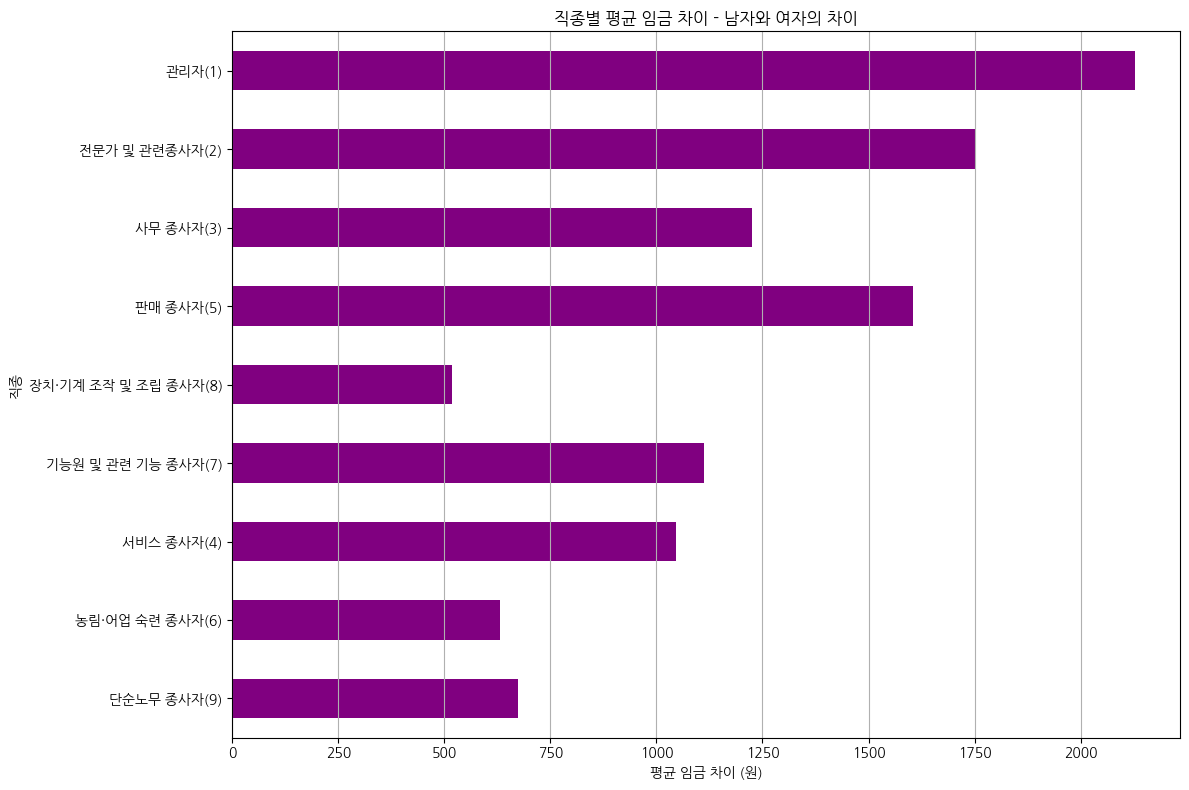

In [62]:


# 직종별로 평균 임금 계산
mean_salary_by_occupation_male = df_male.groupby('직종별')['월임금총액'].mean()
mean_salary_by_occupation_female = df_female.groupby('직종별')['월임금총액'].mean()

# 공통 직종만 남기기
common_occupations = mean_salary_by_occupation_male.index.intersection(mean_salary_by_occupation_female.index)
mean_salary_by_occupation_male = mean_salary_by_occupation_male[common_occupations]
mean_salary_by_occupation_female = mean_salary_by_occupation_female[common_occupations]

# 데이터프레임으로 결합하여 정렬
mean_salary_comparison = pd.DataFrame({
    '남자': mean_salary_by_occupation_male,
    '여자': mean_salary_by_occupation_female
}).sort_values(by='남자')

# 직종별 평균 임금 차이 계산
mean_salary_comparison['차이'] = mean_salary_comparison['남자'] - mean_salary_comparison['여자']

# 그래프 그리기 - 수평 막대 그래프
plt.figure(figsize=(12, 8))
mean_salary_comparison['차이'].plot(kind='barh', color='purple')
plt.xlabel('평균 임금 차이 (원)')
plt.ylabel('직종')
plt.title('직종별 평균 임금 차이 - 남자와 여자의 차이')
plt.grid(axis='x')
plt.tight_layout()
plt.show()


In [63]:


# 연령별로 평균 임금 계산
mean_salary_by_occupation_male = df_male.groupby('연령')['월임금총액'].mean()
mean_salary_by_occupation_female = df_female.groupby('연령')['월임금총액'].mean()


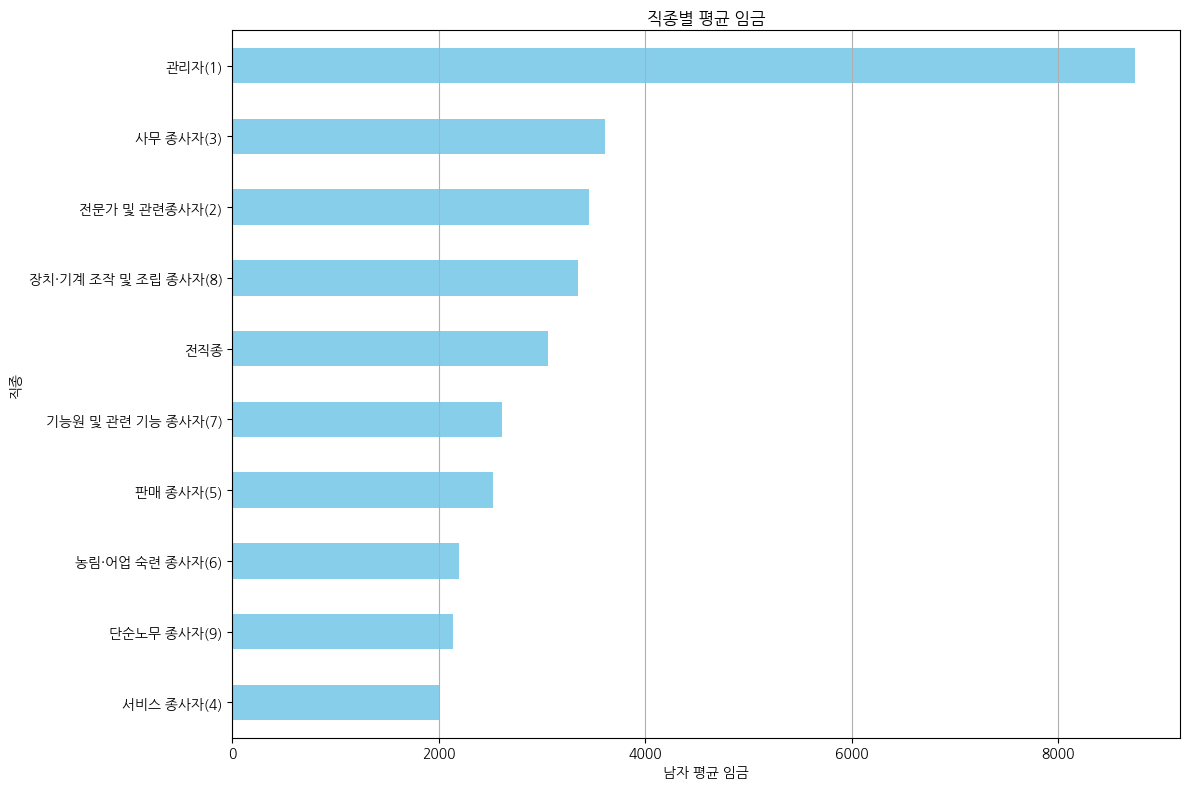

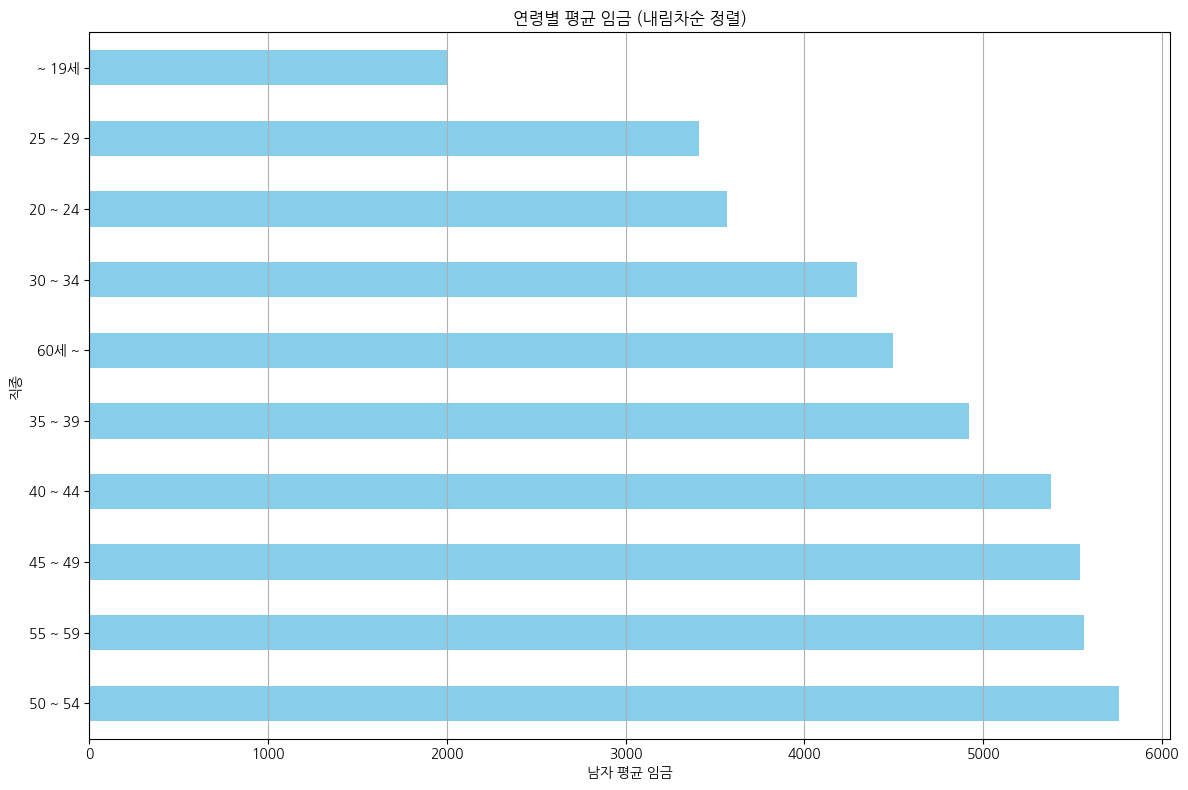

In [69]:

# 원래의 그래프 (직종별 평균 임금 - 남자)
plt.figure(figsize=(12, 8))
mean_salary_by_occupation.plot(kind='barh', color='skyblue')
plt.xlabel('남자 평균 임금')
plt.ylabel('직종')
plt.title('직종별 평균 임금')
plt.grid(axis='x')
plt.tight_layout()
plt.show()

# 연령별 평균 임금 데이터를 큰 순으로 정렬
sorted_mean_salary_by_occupation_male = mean_salary_by_occupation_male.sort_values(ascending=False)

# 정렬된 데이터를 사용한 그래프 (연령별 평균 임금 - 남자)
plt.figure(figsize=(12, 8))
sorted_mean_salary_by_occupation_male.plot(kind='barh', color='skyblue')
plt.xlabel('남자 평균 임금')
plt.ylabel('직종')
plt.title('연령별 평균 임금 (내림차순 정렬)')
plt.grid(axis='x')
plt.tight_layout()
plt.show()


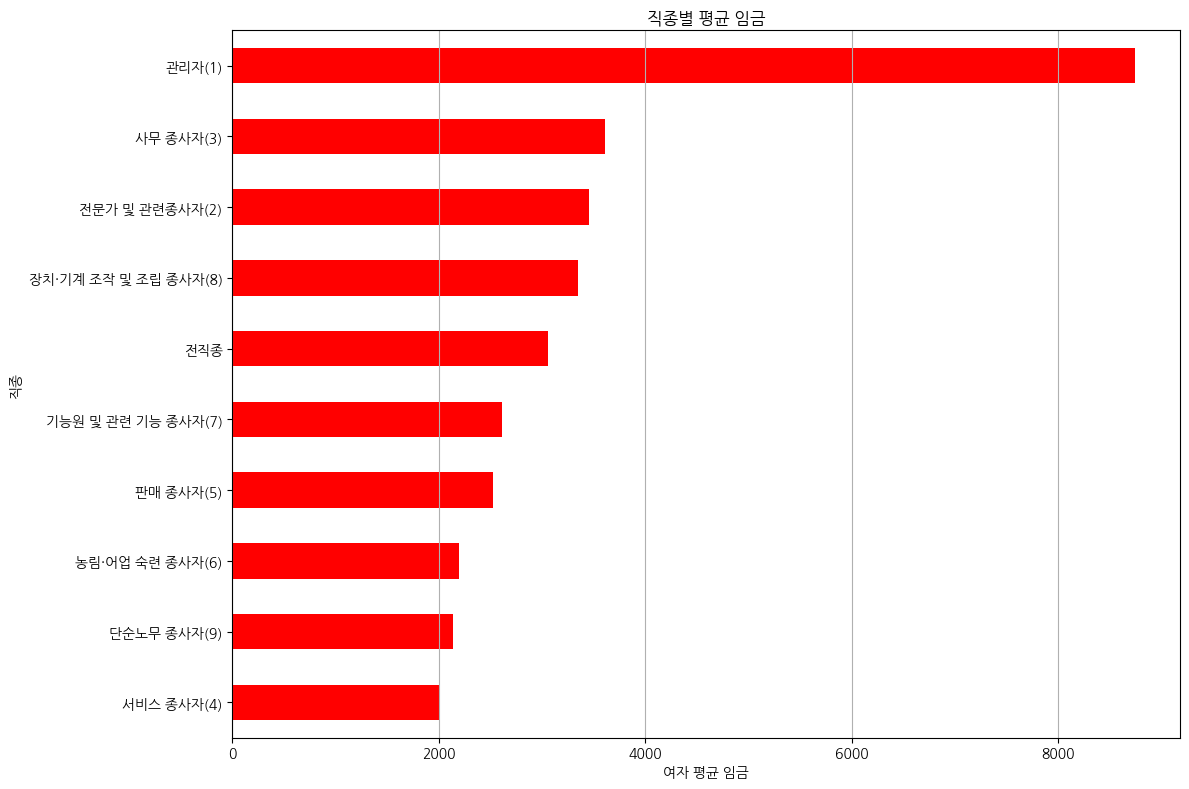

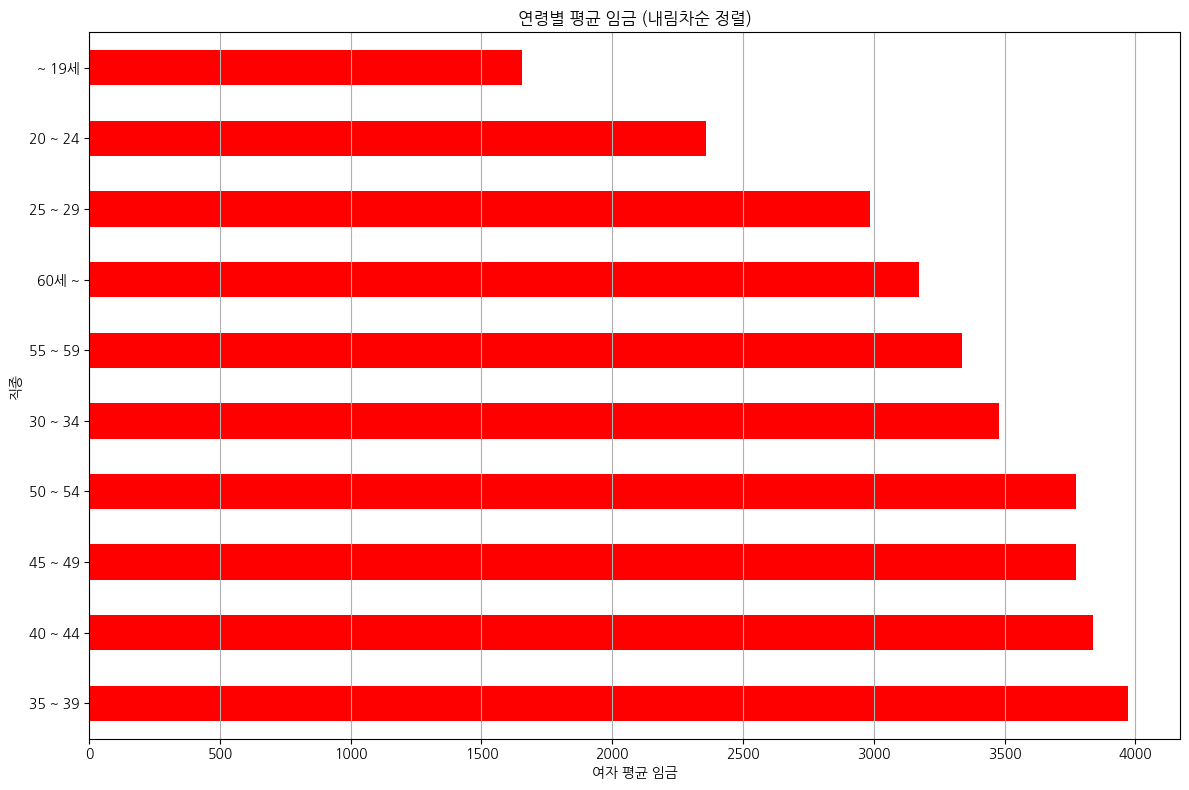

In [67]:

# 원래의 그래프 (직종별 평균 임금)
plt.figure(figsize=(12, 8))
mean_salary_by_occupation.plot(kind='barh', color='red')
plt.xlabel('여자 평균 임금')
plt.ylabel('직종')
plt.title('직종별 평균 임금')
plt.grid(axis='x')
plt.tight_layout()
plt.show()

# 연령별 평균 임금 데이터를 큰 순으로 정렬
sorted_mean_salary_by_occupation_female = mean_salary_by_occupation_female.sort_values(ascending=False)

# 정렬된 데이터를 사용한 그래프 (연령별 평균 임금)
plt.figure(figsize=(12, 8))
sorted_mean_salary_by_occupation_female.plot(kind='barh', color='red')
plt.xlabel('여자 평균 임금')
plt.ylabel('직종')
plt.title('연령별 평균 임금 (내림차순 정렬)')
plt.grid(axis='x')
plt.tight_layout()
plt.show()


In [78]:

# 직종별로 평균 임금 계산
mean_salary_by_occupation_male = df_male.groupby('연령')['월임금총액'].mean()
mean_salary_by_occupation_female = df_female.groupby('연령')['월임금총액'].mean()

# 공통 연령만 남기기
common_occupations = mean_salary_by_occupation_male.index.intersection(mean_salary_by_occupation_female.index)
mean_salary_by_occupation_male = mean_salary_by_occupation_male[common_occupations]
mean_salary_by_occupation_female = mean_salary_by_occupation_female[common_occupations]

# 데이터프레임으로 결합
mean_salary_comparison = pd.DataFrame({
    '남자': mean_salary_by_occupation_male,
    '여자': mean_salary_by_occupation_female
})

# 직종별 평균 임금 차이 계산 (정수형으로 변환)
mean_salary_comparison['차이'] = (mean_salary_comparison['남자'] - mean_salary_comparison['여자']).astype(int)

# 임금 차이가 큰 순으로 정렬
mean_salary_comparison = mean_salary_comparison.sort_values(by='차이', ascending=False)

# 정수형으로 변환된 '차이' 값 출력
print(mean_salary_comparison['차이'])


연령
55 ~ 59    2227
50 ~ 54    1984
45 ~ 49    1766
40 ~ 44    1538
60세 ~      1322
20 ~ 24    1207
35 ~ 39     948
30 ~ 34     813
25 ~ 29     427
~ 19세       343
Name: 차이, dtype: int64


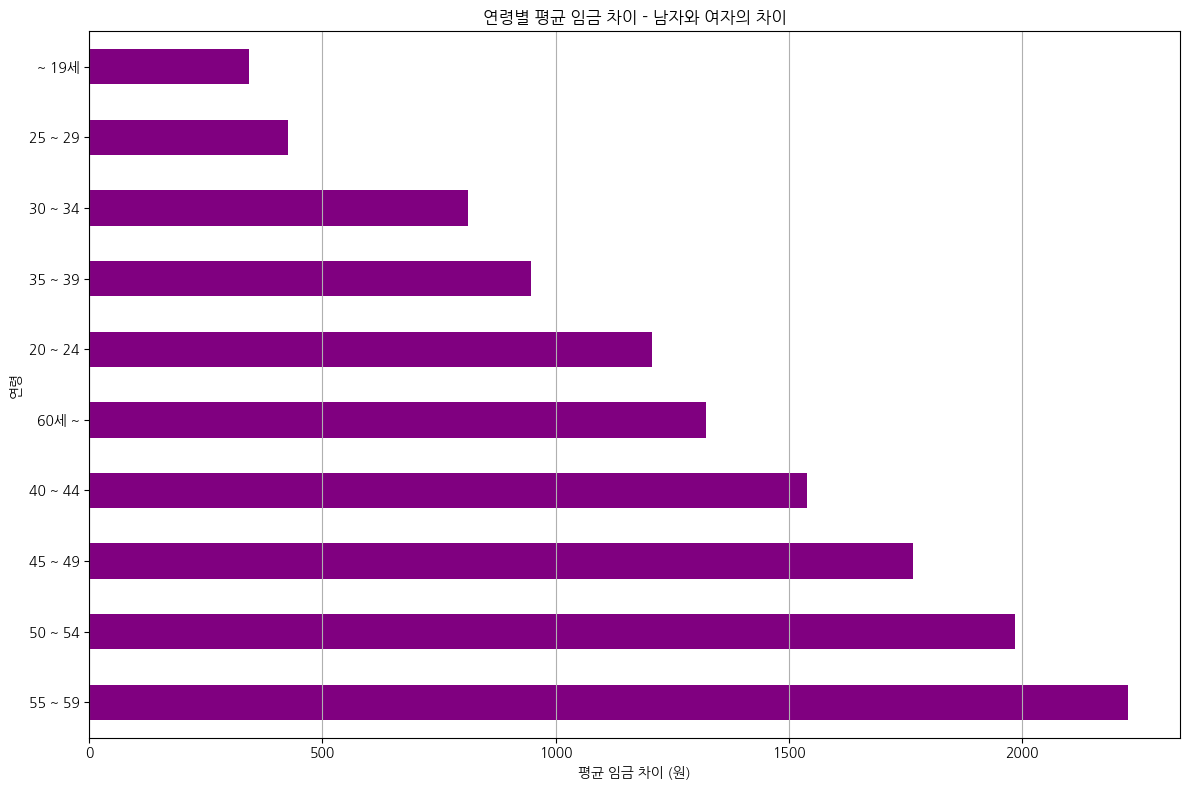

In [79]:

# 그래프 그리기 - 수평 막대 그래프
plt.figure(figsize=(12, 8))
mean_salary_comparison['차이'].plot(kind='barh', color='purple')
plt.xlabel('평균 임금 차이 (원)')
plt.ylabel('연령')
plt.title('연령별 평균 임금 차이 - 남자와 여자의 차이')
plt.grid(axis='x')
plt.tight_layout()
plt.show()


##임금 차이가 나는 이유 분석

In [93]:
import pandas as pd
import matplotlib.pyplot as plt
import koreanize_matplotlib

# 데이터 불러오기
df = pd.read_csv("남자_연령.csv", skiprows=1)
df_male = df[df['직종별'] != '전직종']
# 직종별로 평균 근로일수 계산
male_mean_workdays_by_occupation = df_male.groupby('직종별')['근로일수 (일)'].mean().sort_values()


print(mean_workdays_by_occupation.astype(int))



직종별
전문가 및 관련종사자(2)          20
단순노무 종사자(9)             20
판매 종사자(5)               20
서비스 종사자(4)              20
관리자(1)                  20
사무 종사자(3)               20
기능원 및 관련 기능 종사자(7)      21
장치·기계 조작 및 조립 종사자(8)    21
농림·어업 숙련 종사자(6)         23
Name: 근로일수 (일), dtype: int64


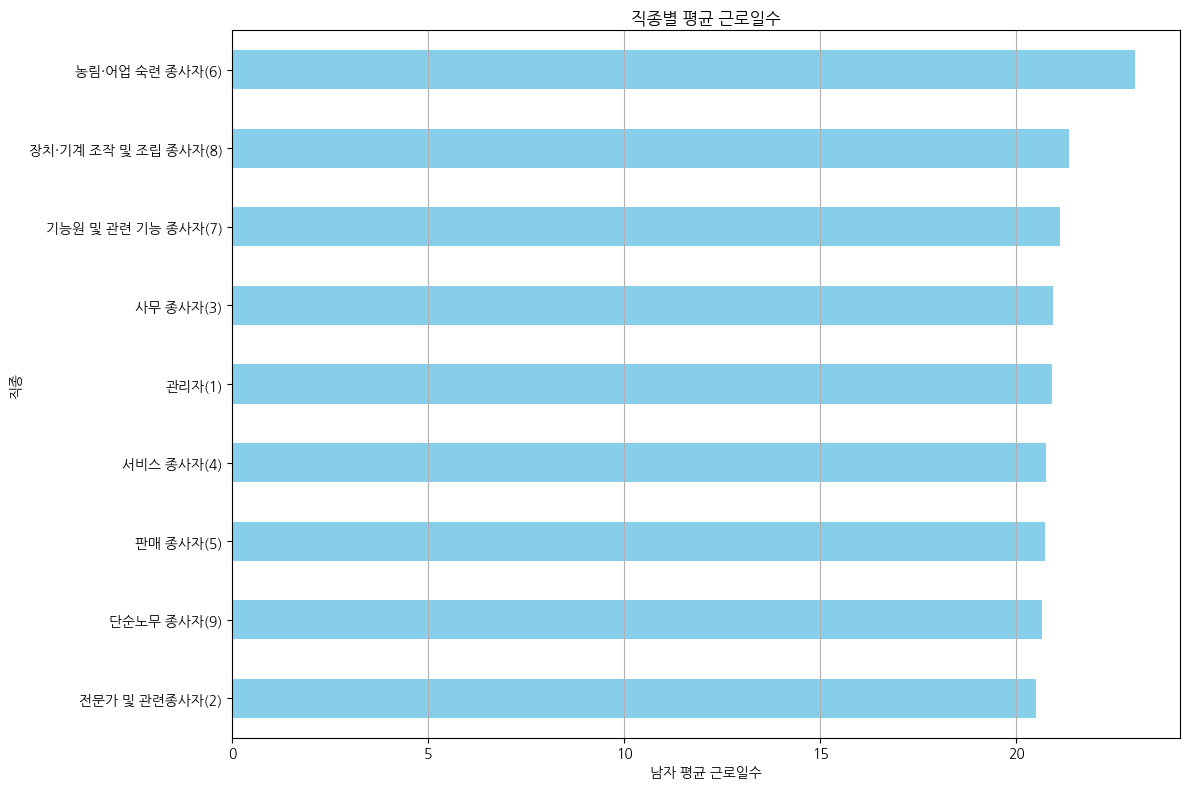

In [94]:
# 그래프 그리기
plt.figure(figsize=(12, 8))
male_mean_workdays_by_occupation.plot(kind='barh', color='skyblue')
plt.xlabel('남자 평균 근로일수')
plt.ylabel('직종')
plt.title('직종별 평균 근로일수')
plt.grid(axis='x')
plt.tight_layout()
plt.show()


In [105]:
import pandas as pd
import matplotlib.pyplot as plt
import koreanize_matplotlib

# 데이터 불러오기
df_female = pd.read_csv("여자_연령.csv", skiprows=1)

# '전직종' 행 제거
df_female = df_female[df_female['직종별'] != '전직종']

# 직종별로 평균 근로일수 계산
female_mean_workdays_by_occupation = df_female.groupby('직종별')['근로일수 (일)'].mean().sort_values()

# 결과를 정수형으로 변환하여 출력
print(female_mean_workdays_by_occupation.astype(int))


직종별
판매 종사자(5)               19
서비스 종사자(4)              19
단순노무 종사자(9)             20
전문가 및 관련종사자(2)          20
사무 종사자(3)               20
관리자(1)                  20
기능원 및 관련 기능 종사자(7)      20
장치·기계 조작 및 조립 종사자(8)    21
농림·어업 숙련 종사자(6)         22
Name: 근로일수 (일), dtype: int64


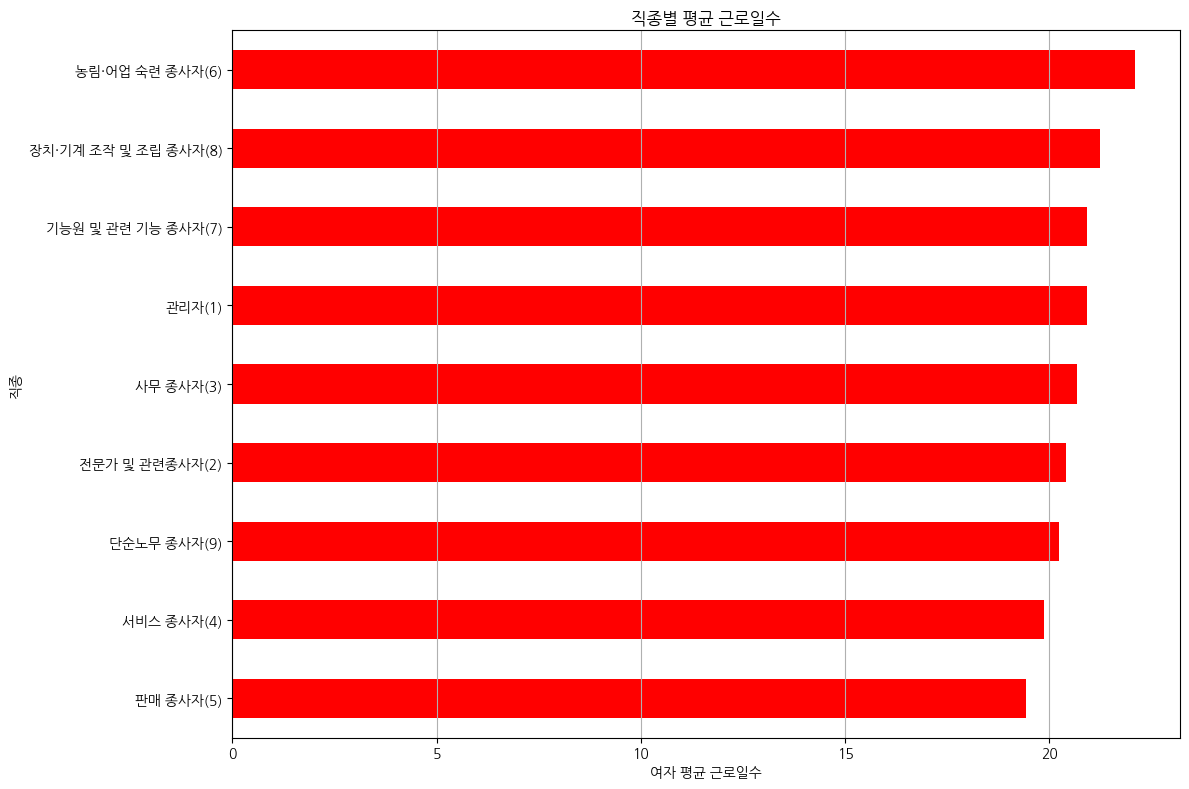

In [106]:

# 그래프 그리기
plt.figure(figsize=(12, 8))
female_mean_workdays_by_occupation.plot(kind='barh', color='red')
plt.xlabel('여자 평균 근로일수')
plt.ylabel('직종')
plt.title('직종별 평균 근로일수')
plt.grid(axis='x')
plt.tight_layout()
plt.show()

##남자 평균 근로일수 - 여자 평균 근로일수

In [107]:
degree_mean_workdays_by_occupation= male_mean_workdays_by_occupation-female_mean_workdays_by_occupation

In [108]:
print(degree_mean_workdays_by_occupation)

직종별
관리자(1)                 -0.001389
기능원 및 관련 기능 종사자(7)      0.200000
농림·어업 숙련 종사자(6)         0.940000
단순노무 종사자(9)             0.440000
사무 종사자(3)               0.270000
서비스 종사자(4)              0.890000
장치·기계 조작 및 조립 종사자(8)    0.100000
전문가 및 관련종사자(2)          0.090000
판매 종사자(5)               1.310000
Name: 근로일수 (일), dtype: float64


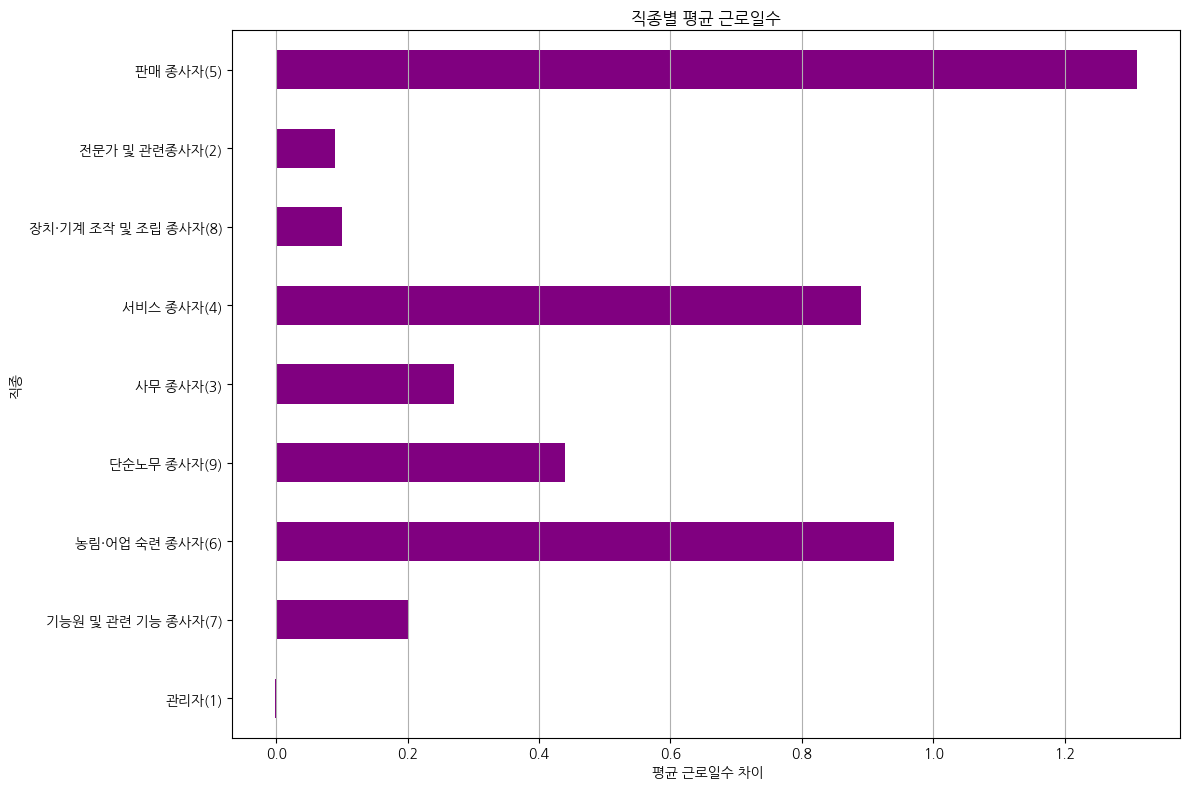

In [109]:
# 그래프 그리기
plt.figure(figsize=(12, 8))
degree_mean_workdays_by_occupation.plot(kind='barh', color='purple')
plt.xlabel(' 평균 근로일수 차이')
plt.ylabel('직종')
plt.title('직종별 평균 근로일수')
plt.grid(axis='x')
plt.tight_layout()
plt.show()

## 남자의 평균 근로 일수가 더 높음